# Ascii art algo

- Downsample

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d 
from skimage.measure import block_reduce
from PIL import Image, ImageFilter

(467, 457, 4)


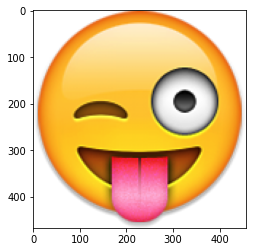

In [2]:
# Let's open our image
image = np.asarray(Image.open("emoji.png"))
print(image.shape) # has alpha values
plt.imshow(image)

In [9]:
""" 
Some math:

input to output shapes
(467, 457, 4) -> (30, 30, 1)

filter must be a total of (467/30, 457/30, 4)

"""
input_shape, output_shape = (467, 457, 4),  (50, 80, 1)
filter_size = (math.ceil(input_shape[0]/output_shape[0]), math.ceil(input_shape[1]/output_shape[1]), math.ceil(input_shape[2]/output_shape[2]))

False
(47, 77)


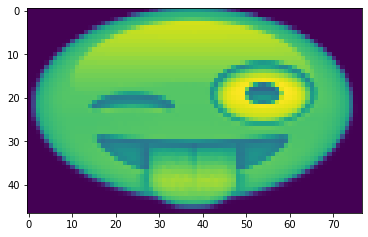

In [10]:
downsampled_img = block_reduce(image, block_size=filter_size, func=np.mean)
print(downsampled_img.shape == (30, 30, 1))

downsampled_img = np.reshape(downsampled_img, downsampled_img.shape[:2])
print(downsampled_img.shape)
plt.imshow(downsampled_img)

In [12]:
# colormap
cmap = """.\'`^",:;Il!i><~+_-?][}{1)(|\\/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"""
out = ""


def dist(p: tuple, q: tuple) -> float:
    return math.sqrt(sum([math.pow(p[i] - q[i], 2) for i in range(len(p))]))

max_dist = dist((255, 255, 255), (0, 0, 0))
print("max:" + str(max_dist))

for w in range(downsampled_img.shape[0]):
    for h in range(downsampled_img.shape[1]):
        distance = downsampled_img[w][h]
        thresh = int(np.interp((distance - 1) / max_dist, [0, 1], [0, len(cmap) - 1]))
        out += cmap[thresh]

    out += "\n"

    
print(out)


max:441.6729559300637
...........................'",i~_?][[[[[[]?-+>;"`............................
.......................`I>?}{1)))((((((((((()))1}]~!"........................
...................."!-{1)(((|||||\//////\\||||((())1]>:'....................
.................^i?{)((|||\tjrnuuvvvvvvvvuunxrf/\||(()1[<,'.................
...............:+})((||\frnuuuuuuuvvvvvvvvuuuuuuuuxj/||((){?l'...............
.............,_{)((|\txuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuxj/||()1?I..............
...........`~{)(||\fnuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuunr/||()1-:............
..........I[)(||\fnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnr/||(){>`..........
........'>{)(|\/rnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnxf\||(1-^.........
.......`_1(||\fxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxj\\|()[:........
......^-)(||\fxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxj/\|()};.......
.....'_)(|\\frrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrj/\|()},......
.....~1(|\\tjrrrrrrrrrrrrrrrrrrrrrrrrrrrrr